<a href="https://colab.research.google.com/github/A01749448/momento-retroalimentacion-m2-framework/blob/main/momentoDeRetroalimentacionM2Framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Implementación de una técnica de ML

In [110]:
'''
Momento de Retroalimentación: Módulo 2 Uso de framework o biblioteca de 
aprendizaje máquina para la implementación de una solución. 
(Portafolio Implementación)

Jorge Chávez Badillo A01749448

09-09-2022
'''

# Importación de Librerías 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import graphviz
import seaborn as sns
from mlxtend.plotting import plot_learning_curves

## Lectura de Datos

In [111]:
# Dataset Breast Cancer
df = pd.read_csv('/content/breast_cancer.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,status
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## Entendimiento de Datos

### Verificación de los Tipos de Datos

In [112]:
'''
Observar los tipos de datos del dataset
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Búsqueda de Valores Nulos

In [113]:
'''
Se genera una tabla donde se obtiene el porcentage de valores nulos en 
el dataset para poder decidir si se hace o no una limpieza de datos para 
procesar los datos que estén incompletos.
'''

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum() / df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
mean radius,0,0.0
concavity error,0,0.0
worst fractal dimension,0,0.0
worst symmetry,0,0.0
worst concave points,0,0.0


### Análisis Estadístico 

In [114]:
'''
Se obtienen estadísticos generales sobre el dataset para poder 
observar el comportamiento
'''

df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,status
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


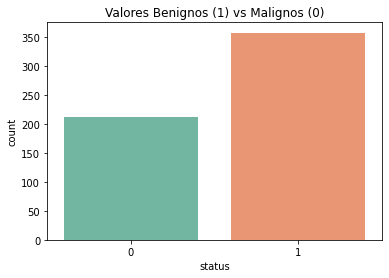

In [115]:
# Comparación de Valores Benignos (1) y Malignos (0)
sns.countplot(df['status'], label="Count", palette = 'Set2').set(title = 'Valores Benignos (1) vs Malignos (0)')
plt.show()

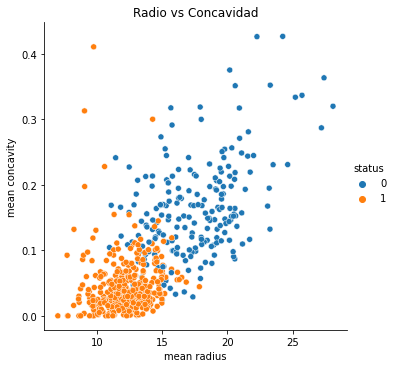

In [116]:
sns.relplot(data = df, x = 'mean radius', y = 'mean concavity', hue = 'status').set(title = 'Radio vs Concavidad')

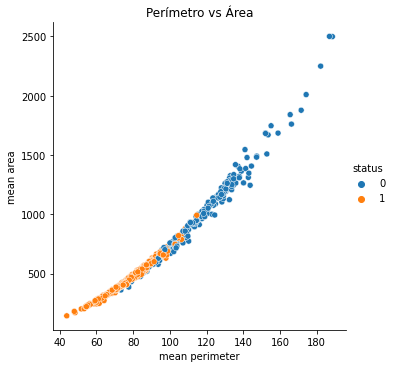

In [117]:
sns.relplot(data = df, x = 'mean perimeter', y = 'mean area', hue = 'status').set(title = 'Perímetro vs Área')

### Búsqueda de Correlaciones

In [118]:
# Matriz de Correlación
correlationMatrix = df.corr()
correlationMatrix.style.background_gradient(cmap='GnBu')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,status
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


## Limpieza y Preparación de los Datos

### Separación del Dataset en Training y Test

In [119]:
'''Ya que no existen valores nulos, solo es necesario preparar los datos para 
ser procesados por el modelo, separar en valores de entrenamiento y pruebas, 
además del escalamiento de los valores de x'''

x = df.copy().drop(columns = ['status'])
y = df['status']

# Training y Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size = 0.20)

### Escalamiento Datos de X

In [120]:
# Escalamiento de x
escalador = StandardScaler()
x_train = escalador.fit_transform(x_train)
x_test = escalador.transform(x_test)

## Modelo Elegido

### Árboles de Decisión (Decision Tree)

### Pruebas con Diferentes Parámetros

In [121]:
# Configuración del Modelo de Árbol de Decisión

# Árbol 1
decisionTree1 = DecisionTreeClassifier(random_state = 0, 
                                       max_depth = 3)
decisionTree1.fit(x_train, y_train)
print('=' * 10, 'Árbol 1', '=' * 10)
print('Score: ', decisionTree1.score(x_train, y_train))
print()

# Árbol 2
decisionTree2 = DecisionTreeClassifier(criterion = 'entropy', 
                                       random_state = 0, 
                                       max_depth = 6)
decisionTree2.fit(x_train, y_train)
print('=' * 10, 'Árbol 2', '=' * 10)
print('Score: ', decisionTree2.score(x_train, y_train))
print()

# Árbol 3
decisionTree3 = DecisionTreeClassifier(criterion = 'entropy', 
                                       random_state = 0, 
                                       max_depth = 6, 
                                       min_samples_split = 4,
                                       min_impurity_decrease=0.01)
decisionTree3.fit(x_train, y_train)
print('=' * 10, 'Árbol 3', '=' * 10)
print('Score: ', decisionTree3.score(x_train, y_train))
print()

# Árbol 4
decisionTree4 = DecisionTreeClassifier(criterion = 'entropy', 
                                       random_state = 0, 
                                       max_depth = 4,
                                       min_impurity_decrease=0.01)
decisionTree4.fit(x_train, y_train)
print('=' * 10, 'Árbol 4', '=' * 10)
print('Score: ', decisionTree4.score(x_train, y_train))
print()

# Árbol 5
decisionTree5 = DecisionTreeClassifier(criterion = 'entropy', 
                                       random_state = 0, 
                                       max_depth = 6,
                                       min_samples_leaf=8,
                                       min_impurity_decrease=0.02)
decisionTree5.fit(x_train, y_train)
print('=' * 10, 'Árbol 5', '=' * 10)
print('Score: ', decisionTree5.score(x_train, y_train))
print()

========== Árbol 1 ==========
Score:  0.967032967032967

========== Árbol 2 ==========
Score:  0.9934065934065934

========== Árbol 3 ==========
Score:  0.9912087912087912

========== Árbol 4 ==========
Score:  0.9714285714285714

========== Árbol 5 ==========
Score:  0.9714285714285714



In [122]:
'''
De acuerdo a los scores obtenidos, tenemos que los parámetros utilizados en
en el árbol número dos tienen un valor más alto, por ello, procedemos a obtener
el mejor valor de alpha para posteriormente hacer las predicciones. 
'''

decisionTree2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

### Búsqueda del Mejor Valor de Alpha

In [123]:
# Obtención de los valores de alpha para encontrar el que tenga mejor desempeño
pruning_data = decisionTree2.cost_complexity_pruning_path(x_train, y_train)
alphaValues = pruning_data.ccp_alphas
impurityValues = pruning_data.impurities
print('Alpha Values: ', alphaValues)

Alpha Values:  [0.         0.01028526 0.01029722 0.01426423 0.01493184 0.01515736
 0.01864599 0.02490115 0.02932672 0.03737029 0.13758824 0.55784164]


Alpha Values:  [0.         0.01028526 0.01029722 0.01426423 0.01493184 0.01515736
 0.01864599 0.02490115 0.02932672 0.03737029 0.13758824 0.55784164]
Trainning Scores:  [0.9934065934065934, 0.9912087912087912, 0.989010989010989, 0.9846153846153847, 0.978021978021978, 0.9714285714285714, 0.9714285714285714, 0.9604395604395605, 0.9604395604395605, 0.9164835164835164, 0.9164835164835164, 0.6329670329670329]
Testing Scores:  [0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.6052631578947368]


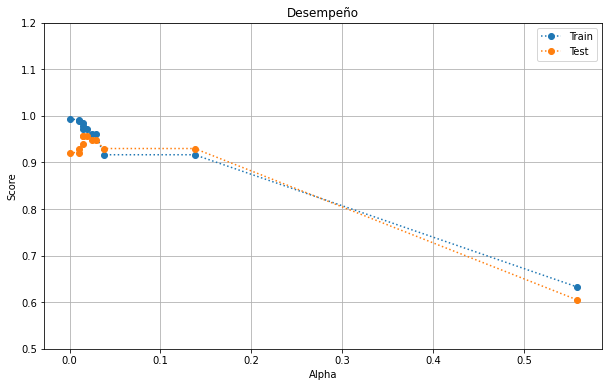

In [124]:
'''
Creación de árboles con los valores de alpha para decidir 
el que tenga un mejor desempeño.
'''

allTrees = []

for thisAlpha in alphaValues:
  thisTree=tree.DecisionTreeClassifier(criterion = 'entropy', 
                                       random_state = 0, 
                                       max_depth = 6, 
                                       ccp_alpha = thisAlpha)
  thisTree.fit(x_train, y_train)
  allTrees.append(thisTree)

# Comparación de desempeño para cada árbol 
allTrainScores = []
allTestScores = []

for thisTree in allTrees:
  allTrainScores.append(thisTree.score(x_train, y_train))
  allTestScores.append(thisTree.score(x_test, y_test))

print('Alpha Values: ', alphaValues)
print('Trainning Scores: ', allTrainScores)
print('Testing Scores: ', allTestScores)

plt.figure(figsize = (10, 6))
plt.grid()
plt.plot(alphaValues, allTrainScores, linestyle = 'dotted', marker = 'o')
plt.plot(alphaValues, allTestScores, linestyle = 'dotted', marker = 'o')
plt.legend(['Train', 'Test'])
plt.title('Desempeño')
plt.xlabel('Alpha')
plt.ylabel('Score')
#plt.xlim(-0.1, 0.3)
plt.ylim(0.5, 1.2)
plt.show()

In [125]:
'''
Como podemos observar, el valor de alpha cuando se encuentra entre 0.0 y 0.015 
tanto para test y train, da como resultado mejores scores, por ello se elegirá
el alpha que se encuentre en ese rango para tener predicciones más acertadas. 
'''

finalTree = DecisionTreeClassifier(criterion = 'entropy', 
                                   random_state = 0,
                                   max_depth = 6, 
                                   ccp_alpha = 0.00910266)
finalTree.fit(x_train, y_train)
print('=' * 10, 'Árbol Final', '=' * 10)
print('Score: ', finalTree.score(x_train, y_train))

========== Árbol Final ==========
Score:  0.9934065934065934


### Visualización del Árbol de Decisión

In [126]:
print(tree.export_text(finalTree))

|--- feature_22 <= 0.25
|   |--- feature_27 <= -0.04
|   |   |--- feature_13 <= 0.21
|   |   |   |--- feature_21 <= 1.25
|   |   |   |   |--- class: 1
|   |   |   |--- feature_21 >  1.25
|   |   |   |   |--- feature_1 <= 0.90
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  0.90
|   |   |   |   |   |--- class: 1
|   |   |--- feature_13 >  0.21
|   |   |   |--- feature_15 <= -0.61
|   |   |   |   |--- class: 0
|   |   |   |--- feature_15 >  -0.61
|   |   |   |   |--- class: 1
|   |--- feature_27 >  -0.04
|   |   |--- feature_21 <= -0.01
|   |   |   |--- feature_23 <= -0.10
|   |   |   |   |--- class: 1
|   |   |   |--- feature_23 >  -0.10
|   |   |   |   |--- feature_6 <= -0.19
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  -0.19
|   |   |   |   |   |--- class: 0
|   |   |--- feature_21 >  -0.01
|   |   |   |--- feature_7 <= 0.16
|   |   |   |   |--- feature_23 <= -0.27
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_23 >  -0.27
|  

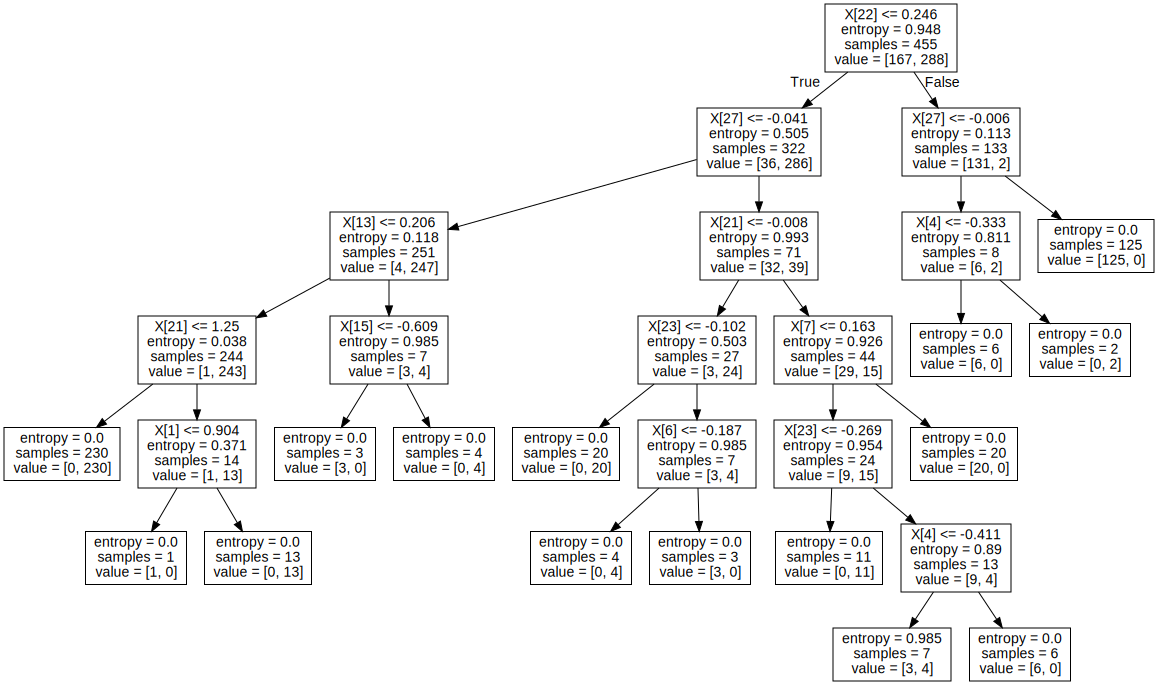

In [127]:
myTreeData = tree.export_graphviz(finalTree)
graphData = graphviz.Source(myTreeData)
graphData

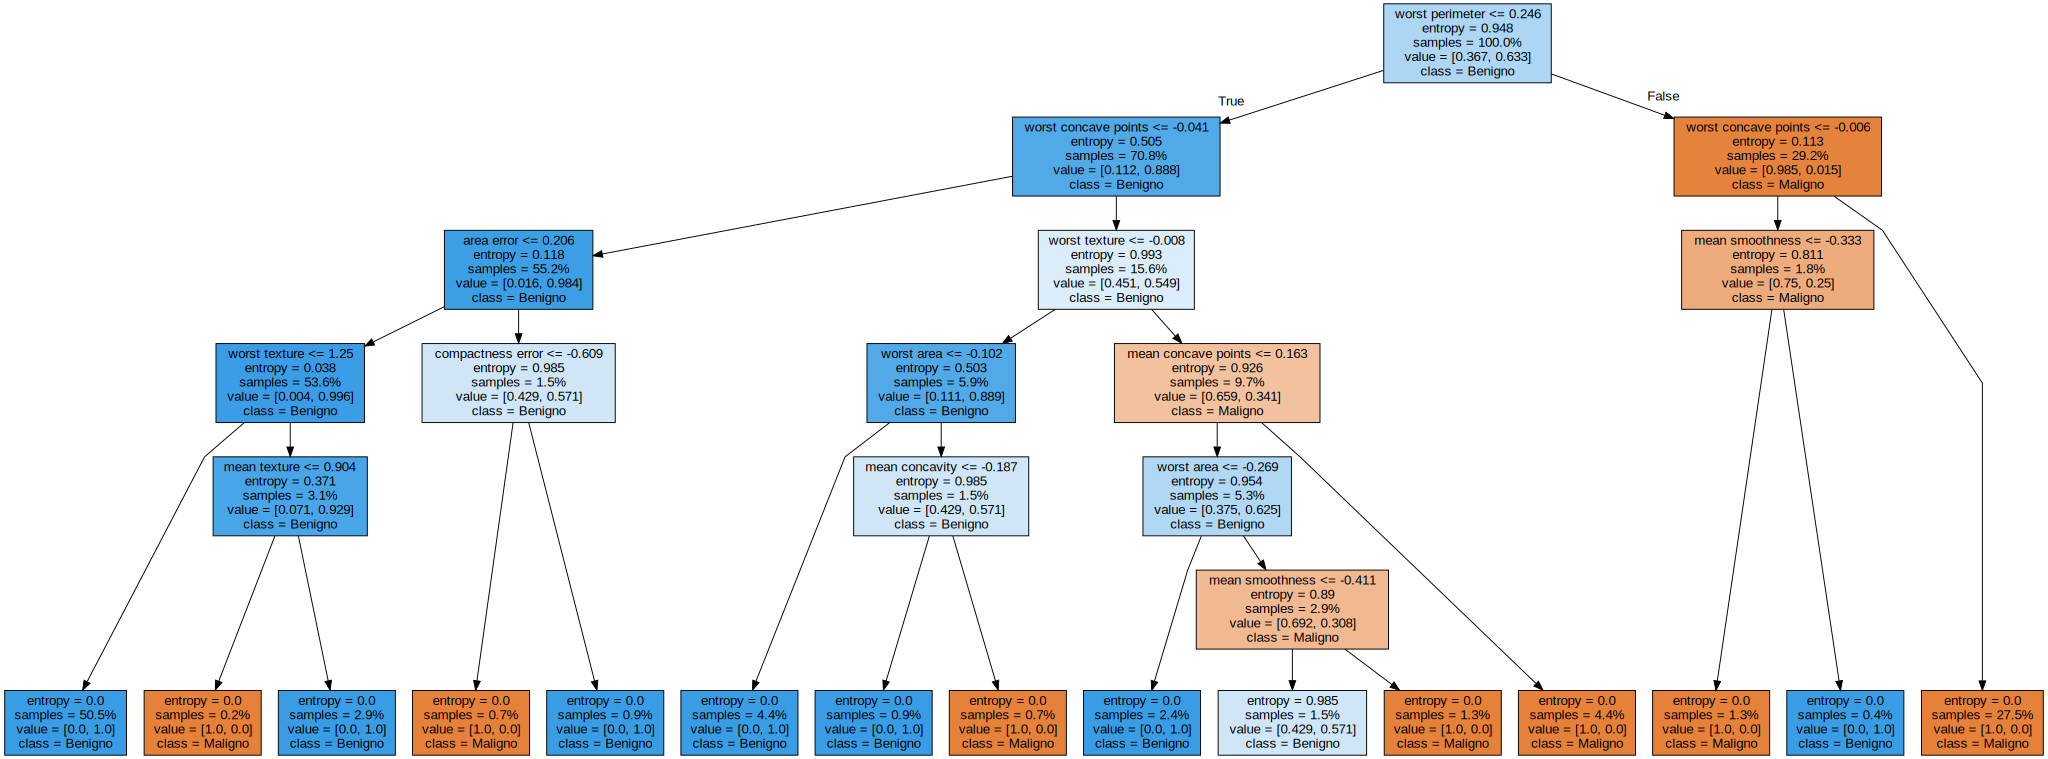

In [128]:
feature_names = x.columns
class_names = ['Maligno', 'Benigno']
finalTreeData = tree.export_graphviz(finalTree, 
                                     feature_names = feature_names,
                                     class_names = class_names, 
                                     leaves_parallel = True,
                                     filled = True, 
                                     proportion = True, 
                                     rotate = False)
graphData = graphviz. Source(finalTreeData)
graphData

### Predicciones Usando el Mejor Modelo

In [129]:
# Prediccion de los valores usando el árbol de decisión 
prediccion = finalTree.predict(x_test)
prediccionVal = finalTree.predict(x_val)
# Valores reales de y
y_test = np.array(y_test)
print('=' * 80)
print('Valores Reales: ')
print(y_test)
print('=' * 80)
print('Predicción: ')
print(prediccion)

Valores Reales: 
[1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0
 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1
 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 1 0 1]
Predicción: 
[1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0
 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1
 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 1 0 1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [130]:
# Probabilidad 
print(finalTree.predict_proba(x_test))

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 

### Métricas

In [131]:
# Classification Report
print(metrics.classification_report(y_test, prediccion, 
                                    target_names = ['Maligno', 'Benigno']))

              precision    recall  f1-score   support

     Maligno       0.88      0.93      0.90        45
     Benigno       0.95      0.91      0.93        69

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [140]:
print('Accuracy Score Test: ', metrics.accuracy_score(y_test, prediccion))
print('Precision Score Test: ', metrics.precision_score(y_test, prediccion))
print('Recall Score Test: ', metrics.recall_score(y_test, prediccion))

Accuracy Score Test:  0.9210526315789473
Precision Score Test:  0.9545454545454546
Recall Score Test:  0.9130434782608695


In [133]:
print('Matriz de Confusión: ')
confusion_matrix = metrics.confusion_matrix(y_test, prediccion, labels = [0, 1])
print(confusion_matrix)

Matriz de Confusión: 
[[42  3]
 [ 6 63]]


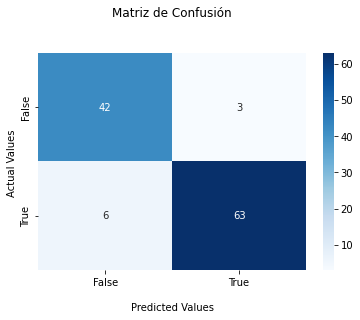

In [134]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de Confusión\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [135]:
feature_importance = pd.DataFrame({'feature_names': feature_names, 'feature_importance': finalTree.feature_importances_})
feature_importance.sort_values(inplace = True, by = 'feature_importance', ascending = False)
feature_importance

,feature_names,feature_importance
22,worst perimeter,0.597767
27,worst concave points,0.167416
21,worst texture,0.047941
23,worst area,0.042442
7,mean concave points,0.041977
13,area error,0.031426
4,mean smoothness,0.026307
15,compactness error,0.016242
6,mean concavity,0.016242
1,mean texture,0.012240


[Text(0.5, 1.0, 'Feature Importance')]

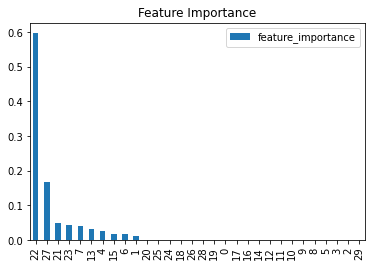

In [136]:
feature_importance.plot.bar().set(title = 'Feature Importance')

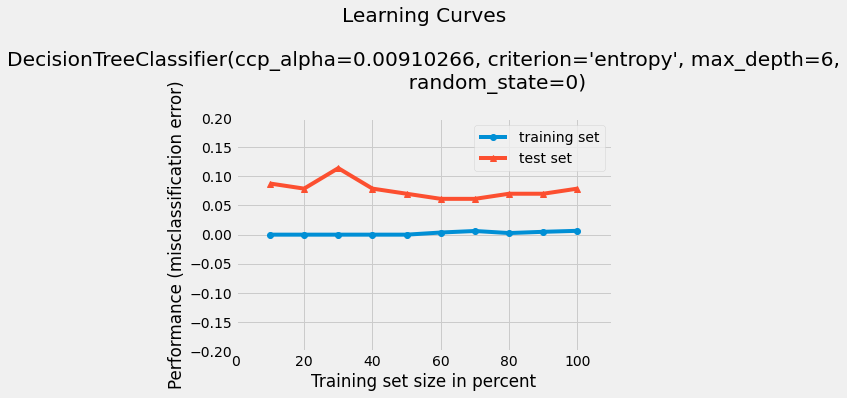

In [137]:
plot_learning_curves(x_train, y_train, x_test, y_test, finalTree)
plt.ylim(-0.2, 0.2)
plt.show()

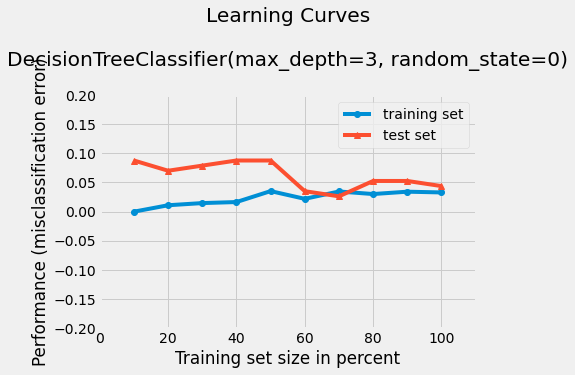

In [138]:
plot_learning_curves(x_train, y_train, x_test, y_test, decisionTree1)
plt.ylim(-0.2, 0.2)
plt.show()

In [139]:
'''
Cómo se puede observar en los gráficos anteriores, con el modelo finalTree se 
llegó a el fit deseado gracias a los valores que fueron elegidos para cada 
uno de los parámetros del árbol de decisión. 
'''

'\nCómo se puede observar en los gráficos anteriores, con el modelo finalTree se \nllegó a el fit deseado gracias a los valores que fueron elegidos para cada \nuno de los parámetros del árbol de decisión. \n'